In [ ]:
import sys
print(sys.executable)


/opt/homebrew/opt/python@3.11/bin/python3.11


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import torch

In [2]:
words = open("names.txt","r").read().splitlines()
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [3]:
len(words)

32033

Count the bigrams

In [7]:
b = {}
for w in words:
    #character start
    chs = ["<S>"] + list(w) + ["<E>"]
    for ch1, ch2 in zip(chs,chs[1:]):
        bigram = (ch1,ch2)
        b[bigram] = b.get(bigram, 0) + 1

In [8]:
print(len(b), b)

627 {('<S>', 'e'): 1531, ('e', 'm'): 769, ('m', 'm'): 168, ('m', 'a'): 2590, ('a', '<E>'): 6640, ('<S>', 'o'): 394, ('o', 'l'): 619, ('l', 'i'): 2480, ('i', 'v'): 269, ('v', 'i'): 911, ('i', 'a'): 2445, ('<S>', 'a'): 4410, ('a', 'v'): 834, ('v', 'a'): 642, ('<S>', 'i'): 591, ('i', 's'): 1316, ('s', 'a'): 1201, ('a', 'b'): 541, ('b', 'e'): 655, ('e', 'l'): 3248, ('l', 'l'): 1345, ('l', 'a'): 2623, ('<S>', 's'): 2055, ('s', 'o'): 531, ('o', 'p'): 95, ('p', 'h'): 204, ('h', 'i'): 729, ('<S>', 'c'): 1542, ('c', 'h'): 664, ('h', 'a'): 2244, ('a', 'r'): 3264, ('r', 'l'): 413, ('l', 'o'): 692, ('o', 't'): 118, ('t', 't'): 374, ('t', 'e'): 716, ('e', '<E>'): 3983, ('<S>', 'm'): 2538, ('m', 'i'): 1256, ('a', 'm'): 1634, ('m', 'e'): 818, ('<S>', 'h'): 874, ('r', 'p'): 14, ('p', 'e'): 197, ('e', 'r'): 1958, ('r', '<E>'): 1377, ('e', 'v'): 463, ('v', 'e'): 568, ('l', 'y'): 1588, ('y', 'n'): 1826, ('n', '<E>'): 6763, ('b', 'i'): 217, ('i', 'g'): 428, ('g', 'a'): 330, ('a', 'i'): 1650, ('i', 'l'): 1

In [9]:
sorted_b = sorted(b.items(), key=lambda kv:kv[1], reverse=True)

In [4]:
chars =  sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
# stoi['<E>'] = 27
itos = {i:s for s,i in stoi.items()}


In [32]:
import string

def all_possible_bigrams():
    alphabet = '.' + string.ascii_lowercase
    print(alphabet)
    return {a + b for a in alphabet for b in alphabet}

bigrams = sorted(all_possible_bigrams())
bigrams[:10]

.abcdefghijklmnopqrstuvwxyz


['..', '.a', '.b', '.c', '.d', '.e', '.f', '.g', '.h', '.i']

In [25]:
chs = words
# print(chs)
bigrams = set()
for w in words:
    chs = ["."] + list(w) + ["."]
    bigrams|=set(zip(chs,chs[1:]))
bigrams = sorted(list(bigrams))
bigrams = [''.join(t) for t in bigrams]
print(bigrams)



['.a', '.b', '.c', '.d', '.e', '.f', '.g', '.h', '.i', '.j', '.k', '.l', '.m', '.n', '.o', '.p', '.q', '.r', '.s', '.t', '.u', '.v', '.w', '.x', '.y', '.z', 'a.', 'aa', 'ab', 'ac', 'ad', 'ae', 'af', 'ag', 'ah', 'ai', 'aj', 'ak', 'al', 'am', 'an', 'ao', 'ap', 'aq', 'ar', 'as', 'at', 'au', 'av', 'aw', 'ax', 'ay', 'az', 'b.', 'ba', 'bb', 'bc', 'bd', 'be', 'bh', 'bi', 'bj', 'bl', 'bn', 'bo', 'br', 'bs', 'bt', 'bu', 'by', 'c.', 'ca', 'cc', 'cd', 'ce', 'cg', 'ch', 'ci', 'cj', 'ck', 'cl', 'co', 'cp', 'cq', 'cr', 'cs', 'ct', 'cu', 'cx', 'cy', 'cz', 'd.', 'da', 'db', 'dc', 'dd', 'de', 'df', 'dg', 'dh', 'di', 'dj', 'dk', 'dl', 'dm', 'dn', 'do', 'dq', 'dr', 'ds', 'dt', 'du', 'dv', 'dw', 'dy', 'dz', 'e.', 'ea', 'eb', 'ec', 'ed', 'ee', 'ef', 'eg', 'eh', 'ei', 'ej', 'ek', 'el', 'em', 'en', 'eo', 'ep', 'eq', 'er', 'es', 'et', 'eu', 'ev', 'ew', 'ex', 'ey', 'ez', 'f.', 'fa', 'fe', 'ff', 'fg', 'fh', 'fi', 'fk', 'fl', 'fn', 'fo', 'fr', 'fs', 'ft', 'fu', 'fw', 'fy', 'fz', 'g.', 'ga', 'gb', 'gd', 'ge', 'gf

In [48]:
sstoi = {s:i for i,s in enumerate(bigrams)}
print(sstoi['..'])
# sstoi['..'] = 0 \
# stoi['<E>'] = 27
itoss = {i:s for s,i in sstoi.items()}
len(sstoi)

print(itoss.get(1))

0
.a


In [21]:
bigrams =  sorted(list(set(''.join(words))))
print(bigrams)
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
# stoi['<E>'] = 27
itos = {i:s for s,i in stoi.items()}


['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


In [13]:
27*27

729

In [58]:
N = torch.zeros((27*27,27),dtype=torch.int32)
for w in words:
    #character start
    chs = ["."] + list(w) + ["."]
    for ch1, ch2, ch3 in zip(chs,chs[1:],chs[2:]):
        idx1 = sstoi[ch1+ch2]
        idx2 = stoi[ch3]

        N[idx1,idx2]+=1

(-0.5, 26.5, 728.5, -0.5)

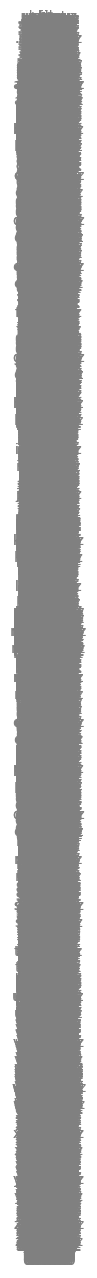

In [50]:

plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range(27*27):
    for j in range(27):
        chstr = itoss[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray')
plt.axis('off')

In [68]:
print(itoss[1])
N[0]

.a


tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0], dtype=torch.int32)

In [65]:
P = (N+1).float()
P /= P.sum(dim=1,keepdim=True)
P[1]

tensor([0.0002, 0.0469, 0.0430, 0.0072, 0.0827, 0.0126, 0.0050, 0.0041, 0.0207,
        0.0349, 0.0063, 0.0171, 0.1427, 0.0868, 0.1406, 0.0025, 0.0041, 0.0023,
        0.1089, 0.0439, 0.0165, 0.0345, 0.0550, 0.0016, 0.0063, 0.0392, 0.0345])

(-0.5, 26.5, 26.5, -0.5)

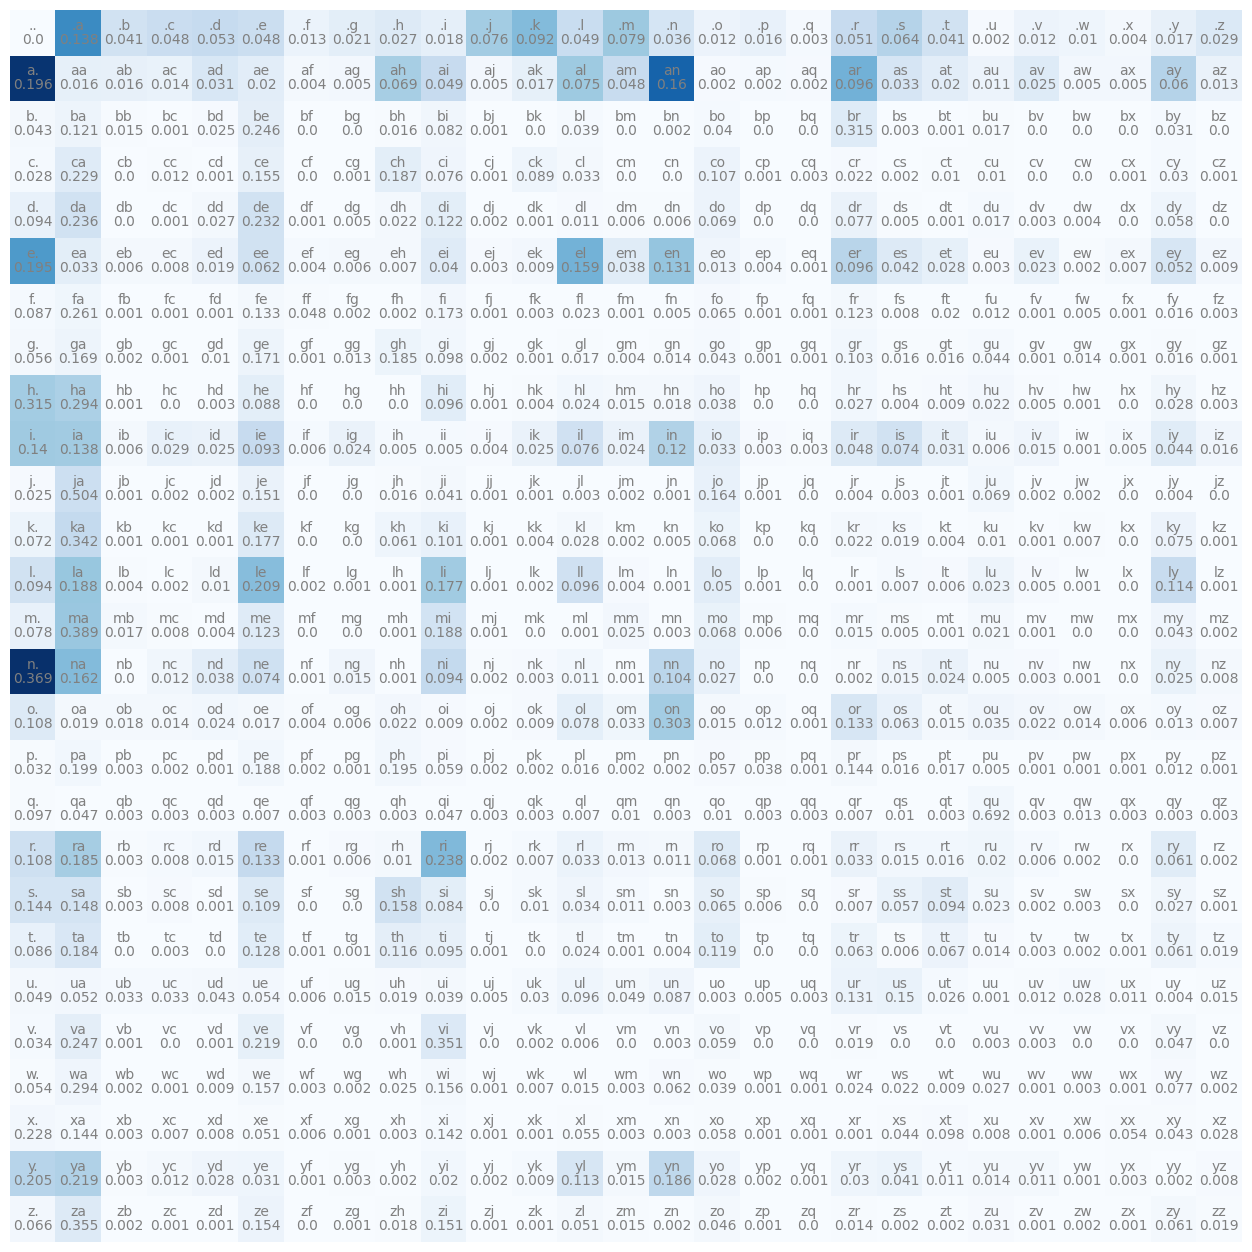

In [177]:
plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, round(P[i, j].item(),3), ha="center", va="top", color='gray')
plt.axis('off')

In [108]:
g = torch.Generator().manual_seed(2147483647)

p = torch.rand(3,generator=g)
p /= p.sum()
p

tensor([0.6064, 0.3033, 0.0903])

In [109]:
torch.multinomial(p,100,replacement=True, generator=g)

tensor([1, 1, 2, 0, 0, 2, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 2, 0, 0,
        1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
        0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 1, 0,
        0, 1, 1, 1])

In [74]:
print(P[0])
p = P[1].float()
p = p/p.sum()
p

tensor([0.0370, 0.0370, 0.0370, 0.0370, 0.0370, 0.0370, 0.0370, 0.0370, 0.0370,
        0.0370, 0.0370, 0.0370, 0.0370, 0.0370, 0.0370, 0.0370, 0.0370, 0.0370,
        0.0370, 0.0370, 0.0370, 0.0370, 0.0370, 0.0370, 0.0370, 0.0370, 0.0370])


tensor([0.0002, 0.0469, 0.0430, 0.0072, 0.0827, 0.0126, 0.0050, 0.0041, 0.0207,
        0.0349, 0.0063, 0.0171, 0.1427, 0.0868, 0.1406, 0.0025, 0.0041, 0.0023,
        0.1089, 0.0439, 0.0165, 0.0345, 0.0550, 0.0016, 0.0063, 0.0392, 0.0345])

In [75]:
g = torch.Generator().manual_seed(2147483647)
print(p, p.shape)
ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
itos[ix]

tensor([0.0002, 0.0469, 0.0430, 0.0072, 0.0827, 0.0126, 0.0050, 0.0041, 0.0207,
        0.0349, 0.0063, 0.0171, 0.1427, 0.0868, 0.1406, 0.0025, 0.0041, 0.0023,
        0.1089, 0.0439, 0.0165, 0.0345, 0.0550, 0.0016, 0.0063, 0.0392, 0.0345]) torch.Size([27])


'd'

In [76]:
g = torch.Generator().manual_seed(2147483647)

for i in range(5):
    out = []
    ix = 0
    while True:
        #select row of probabilities
        p = P[ix].float()
        # p/=p.sum()
        # p = torch.ones(27)/27.0
        ix = torch.multinomial(p,1,replacement=True,generator=g).item()
        ch = itos[ix]
        out.append(ch)

        if ix == 0:
            break
    print(''.join(out))

cexzamiomalurarochatyhamelaimitrainyakadazalizarelazyaubrabhamiotashisaiselavugizotedarelalavamadaluenivvirayololuprhulivevvtalevelunyorobrelilelyalaisanairazenilemakayelizamirhalelikajahaabevarhamulelelulemabrutayhareenanyalosalishavazedelochoshabiteaumilavarosariyemaleilemanadmidamauzhalamcoamanemaneisharomaalusahocimyolalazalelazemarahayuralodadayutamisashougelulubeyucabohalaamominutetoradorabocrademanamaraniavivaradamakahaghorudalaarolaklalimaroanolaayelenalixalsulolaemadelofatiririvanashayaaleronemadatyuriroobrumarhavimeamarenairadalizistamaamanevinayuleleseadajemaniroarhoxyomikabromanomisiswitrazhanajonastavinedarizamihaadelosivedanishanistazamavareletananyakeloshanazoraagisaicalavimavavalacisyouwhadivarikemadedademadearomcamalolelavloyanarerolasyazabremaladarodedavisomazurolemadjhamalololatedesakezaistrooauiyarefelifavzazemuracevasuradezyayarozyesematraharisaladraynaurhavaleliladeladabralyav.
inavayumixaulioladauaisadadeulilyuguizanemamamasamanodayavirocrulodaedalalyaraisutyolul

In [220]:
log_likelihood = 0.0
n=0
for w in words:
    #character start
    chs = ["."] + list(w) + ["."]
    for ch1, ch2 in zip(chs,chs[1:]):
        idx1 = stoi[ch1]
        idx2 = stoi[ch2]
        prob = P[idx1,idx2]
        logprob = torch.log(prob)
        log_likelihood+=logprob
        # print(f"{ch1}{ch2}: {prob:.4f}, {logprob:.4f}")
        n+=1
        # N[idx1,idx2]+=1
nll = -log_likelihood
print(f"{nll/n=}")


nll/n=tensor(3.3363)


In [81]:
xs, ys = [], []

for w in words[:1]:
    #character start
    chs = ["."] + list(w) + ["."]
    for ch1, ch2, ch3 in zip(chs,chs[1:], chs[2:]):
        idx1 = sstoi[ch1+ch2]
        idx2 = stoi[ch3]
        xs.append(idx1)
        ys.append(idx2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
xs,ys
[itoss[i.item()] for i in xs]

['.e', 'em', 'mm', 'ma']

torch.float32

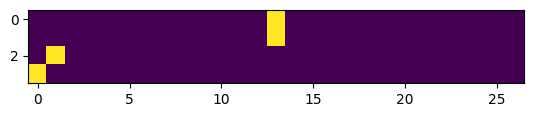

In [83]:
import torch.nn.functional as F

xenc = F.one_hot(xs,num_classes=729).float() # one hot encoding
yenc = F.one_hot(ys, num_classes=27).float()
plt.imshow(yenc)
xenc.dtype
# plt.imshow(yenc)

In [84]:
#make 27 neurons with 729 inputs each with random weights
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((729,27),generator=g)
xenc.shape
# (xenc@W)
# plt.imshow(xenc@W)

torch.Size([4, 729])

In [85]:
logits = (xenc@W) # log-counts
print(logits.shape)
# next two lines are softmax (out = e^z/sum(e(z)))
counts = logits.exp() # equivalent-ish to N matrix of counts from earlier 
probs = counts/counts.sum(dim=1,keepdim=True)
probs

torch.Size([4, 27])


tensor([[0.0290, 0.0796, 0.0248, 0.0521, 0.1989, 0.0289, 0.0094, 0.0335, 0.0097,
         0.0301, 0.0702, 0.0228, 0.0115, 0.0181, 0.0108, 0.0315, 0.0291, 0.0045,
         0.0916, 0.0215, 0.0486, 0.0300, 0.0501, 0.0027, 0.0118, 0.0022, 0.0472],
        [0.0225, 0.1182, 0.0491, 0.0079, 0.0210, 0.0090, 0.0082, 0.0792, 0.0857,
         0.0670, 0.0166, 0.0229, 0.0127, 0.0082, 0.1269, 0.0384, 0.0237, 0.0041,
         0.0257, 0.0761, 0.0642, 0.0330, 0.0047, 0.0161, 0.0190, 0.0322, 0.0077],
        [0.0749, 0.0326, 0.0100, 0.0488, 0.0360, 0.0102, 0.0430, 0.0246, 0.0238,
         0.0511, 0.0037, 0.0019, 0.0767, 0.0118, 0.0222, 0.0137, 0.0130, 0.0087,
         0.0104, 0.0319, 0.0474, 0.0094, 0.0037, 0.2830, 0.0036, 0.0918, 0.0120],
        [0.0108, 0.0381, 0.0228, 0.0631, 0.0425, 0.0151, 0.0231, 0.0194, 0.0038,
         0.0091, 0.0537, 0.1120, 0.0369, 0.0126, 0.0208, 0.0180, 0.0141, 0.0290,
         0.2448, 0.0187, 0.0165, 0.0254, 0.0155, 0.0227, 0.0569, 0.0238, 0.0307]])

In [87]:
nlls = torch.zeros(4)
for i in range(4):
  # i-th bigram:
  x = xs[i].item() # input character index
  y = ys[i].item() # label character index
  print('--------')
  print(f'bigram example {i+1}: {itoss[x]}{itos[y]} (indexes {x},{y})')
  print('input to the neural net:', x)
  print('output probabilities from the neural net:', probs[i])
  print('label (actual next character):', y)
  p = probs[i, y]
  print('probability assigned by the net to the the correct character:', p.item())
  logp = torch.log(p)
  print('log likelihood:', logp.item())
  nll = -logp
  print('negative log likelihood:', nll.item())
  nlls[i] = nll

print('=========')
print('average negative log likelihood, i.e. loss =', nlls.mean().item())


--------
bigram example 1: .em (indexes 5,13)
input to the neural net: 5
output probabilities from the neural net: tensor([0.0290, 0.0796, 0.0248, 0.0521, 0.1989, 0.0289, 0.0094, 0.0335, 0.0097,
        0.0301, 0.0702, 0.0228, 0.0115, 0.0181, 0.0108, 0.0315, 0.0291, 0.0045,
        0.0916, 0.0215, 0.0486, 0.0300, 0.0501, 0.0027, 0.0118, 0.0022, 0.0472])
label (actual next character): 13
probability assigned by the net to the the correct character: 0.018050702288746834
log likelihood: -4.014570713043213
negative log likelihood: 4.014570713043213
--------
bigram example 2: emm (indexes 148,13)
input to the neural net: 148
output probabilities from the neural net: tensor([0.0225, 0.1182, 0.0491, 0.0079, 0.0210, 0.0090, 0.0082, 0.0792, 0.0857,
        0.0670, 0.0166, 0.0229, 0.0127, 0.0082, 0.1269, 0.0384, 0.0237, 0.0041,
        0.0257, 0.0761, 0.0642, 0.0330, 0.0047, 0.0161, 0.0190, 0.0322, 0.0077])
label (actual next character): 13
probability assigned by the net to the the correct char

In [89]:
xs, ys = [], []

for w in words:
    #character start
    chs = ["."] + list(w) + ["."]
    for ch1, ch2, ch3 in zip(chs,chs[1:], chs[2:]):
        idx1 = sstoi[ch1+ch2]
        idx2 = stoi[ch3]
        xs.append(idx1)
        ys.append(idx2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
num


196113

In [90]:
import torch.nn.functional as F

xenc = F.one_hot(xs,num_classes=729).float() # one hot encoding
yenc = F.one_hot(ys, num_classes=27).float()
# plt.imshow(xenc)

In [91]:
#make 27 neurons with 729 inputs each with ranom weights
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((729,27),generator=g,requires_grad=True)


In [123]:
lr = 50
for i in range(50):
    #forward pass
    logits = (xenc@W) # log-counts
    # next two lines are softmax (out = e^z/sum(e(z)))
    counts = logits.exp() # equivalent-ish to N matrix of counts from earlier 
    probs = counts/counts.sum(dim=1,keepdim=True)
    #find the probabilities output by the network, and then find the negative log likelihood nll (and average)
    loss = -probs[torch.arange(num), ys].log().mean() + 0.01 * (W**2).mean() #also with L2 regularization loss
    print(loss.item())
    #backward pass
    W.grad = None #set the parameter gradients to zero
    loss.backward() #do the backward pass
    W.data -=lr*W.grad


2.106232166290283
2.1062188148498535
2.106205463409424
2.106191873550415
2.1061785221099854
2.106165885925293
2.106152296066284
2.106139898300171
2.1061267852783203
2.106114387512207
2.1061015129089355
2.1060891151428223
2.10607647895813
2.1060640811920166
2.1060516834259033
2.10603928565979
2.106027126312256
2.1060149669647217
2.1060032844543457
2.1059911251068115
2.1059792041778564
2.1059672832489014
2.1059556007385254
2.1059436798095703
2.1059319972991943
2.1059200763702393
2.1059088706970215
2.1058971881866455
2.1058857440948486
2.1058743000030518
2.105862855911255
2.105851411819458
2.105839967727661
2.1058290004730225
2.1058177947998047
2.105806589126587
2.1057956218719482
2.1057841777801514
2.105773448944092
2.105762243270874
2.1057512760162354
2.1057403087615967
2.105729579925537
2.1057186126708984
2.105707883834839
2.105696678161621
2.1056861877441406
2.105675458908081
2.1056649684906006
2.105654239654541


In [124]:
#generating new names now;
# instead of P we use probs
#need a starting index
g = torch.Generator().manual_seed(2147483647)
for i in range(10):
    ix = 0
    out = []
    while True:
        p = probs[ix]
        ix = torch.multinomial(p,1,replacement=True,generator=g).item()
        # print(ix)
        out.append(itos[ix])
        if ix == 0:
            break
    out = ''.join(out)
    print(out)


dsebeaihaoluaainaintytnellnims.
nainhamzhk.
mln.
r.
seainhuhjtnhr.
int.
mmms.
i.
llnho.
mz.


***Exercise 1: trigrams***

In [125]:
import string

def all_possible_bigrams():
    alphabet = '.' + string.ascii_lowercase
    print(alphabet)
    return {a + b for a in alphabet for b in alphabet}

bigrams = sorted(all_possible_bigrams())
bigrams[:10]

.abcdefghijklmnopqrstuvwxyz


['..', '.a', '.b', '.c', '.d', '.e', '.f', '.g', '.h', '.i']

In [126]:
N = torch.zeros((27*27,27),dtype=torch.int32)
for w in words:
    #character start
    chs = ["."] + list(w) + ["."]
    for ch1, ch2, ch3 in zip(chs,chs[1:],chs[2:]):
        idx1 = sstoi[ch1+ch2]
        idx2 = stoi[ch3]

        N[idx1,idx2]+=1

In [127]:
P = (N+1).float()
P /= P.sum(dim=1,keepdim=True)
P[1]

tensor([0.0002, 0.0469, 0.0430, 0.0072, 0.0827, 0.0126, 0.0050, 0.0041, 0.0207,
        0.0349, 0.0063, 0.0171, 0.1427, 0.0868, 0.1406, 0.0025, 0.0041, 0.0023,
        0.1089, 0.0439, 0.0165, 0.0345, 0.0550, 0.0016, 0.0063, 0.0392, 0.0345])

In [128]:
g = torch.Generator().manual_seed(2147483647)

for i in range(5):
    out = []
    ix = 0
    while True:
        #select row of probabilities
        p = P[ix].float()
        # p/=p.sum()
        # p = torch.ones(27)/27.0
        ix = torch.multinomial(p,1,replacement=True,generator=g).item()
        ch = itos[ix]
        out.append(ch)

        if ix == 0:
            break
    print(''.join(out))

cexzamiomalurarochatyhamelaimitrainyakadazalizarelazyaubrabhamiotashisaiselavugizotedarelalavamadaluenivvirayololuprhulivevvtalevelunyorobrelilelyalaisanairazenilemakayelizamirhalelikajahaabevarhamulelelulemabrutayhareenanyalosalishavazedelochoshabiteaumilavarosariyemaleilemanadmidamauzhalamcoamanemaneisharomaalusahocimyolalazalelazemarahayuralodadayutamisashougelulubeyucabohalaamominutetoradorabocrademanamaraniavivaradamakahaghorudalaarolaklalimaroanolaayelenalixalsulolaemadelofatiririvanashayaaleronemadatyuriroobrumarhavimeamarenairadalizistamaamanevinayuleleseadajemaniroarhoxyomikabromanomisiswitrazhanajonastavinedarizamihaadelosivedanishanistazamavareletananyakeloshanazoraagisaicalavimavavalacisyouwhadivarikemadedademadearomcamalolelavloyanarerolasyazabremaladarodedavisomazurolemadjhamalololatedesakezaistrooauiyarefelifavzazemuracevasuradezyayarozyesematraharisaladraynaurhavaleliladeladabralyav.
inavayumixaulioladauaisadadeulilyuguizanemamamasamanodayavirocrulodaedalalyaraisutyolul

In [129]:
xs, ys = [], []

for w in words:
    #character start
    chs = ["."] + list(w) + ["."]
    for ch1, ch2, ch3 in zip(chs,chs[1:], chs[2:]):
        idx1 = sstoi[ch1+ch2]
        idx2 = stoi[ch3]
        xs.append(idx1)
        ys.append(idx2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
num


196113

In [130]:
import torch.nn.functional as F

xenc = F.one_hot(xs,num_classes=729).float() # one hot encoding
yenc = F.one_hot(ys, num_classes=27).float()
# plt.imshow(xenc)

In [131]:
#make 27 neurons with 729 inputs each with random weights
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((729,27),generator=g,requires_grad=True)


torch.Size([196113])

In [132]:
lr = 50
for i in range(50):
    #forward pass
    logits = (xenc@W) # log-counts
    # next two lines are softmax (out = e^z/sum(e(z)))
    counts = logits.exp() # equivalent-ish to N matrix of counts from earlier 
    probs = counts/counts.sum(dim=1,keepdim=True)
    #find the probabilities output by the network, and then find the negative log likelihood nll (and average)
    loss = -probs[torch.arange(num), ys].log().mean() + 0.01 * (W**2).mean() #also with L2 regularization loss
    print(loss.item())
    #backward pass
    W.grad = None #set the parameter gradients to zero
    loss.backward() #do the backward pass
    W.data -=lr*W.grad


3.7331693172454834
3.6575067043304443
3.5865390300750732
3.5202581882476807
3.458679676055908
3.4017715454101562
3.3494110107421875
3.3013699054718018
3.2573297023773193
3.2169063091278076
3.179690361022949
3.1452884674072266
3.1133475303649902
3.083566665649414
3.0556979179382324
3.0295357704162598
3.004911184310913
2.981682777404785
2.959730863571167
2.9389517307281494
2.919254779815674
2.9005606174468994
2.882798433303833
2.8659026622772217
2.849816083908081
2.8344857692718506
2.819861888885498
2.8058998584747314
2.792557716369629
2.779794692993164
2.767575263977051
2.7558653354644775
2.744631767272949
2.733844041824341
2.7234749794006348
2.7134971618652344
2.703887462615967
2.6946229934692383
2.6856820583343506
2.677046060562134
2.6686975955963135
2.6606192588806152
2.6527962684631348
2.645214796066284
2.637862205505371
2.6307260990142822
2.623795986175537
2.617060661315918
2.6105117797851562
2.604140043258667


In [134]:
#generating new names now;
# instead of P we use probs
#need a starting index
g = torch.Generator().manual_seed(2147483647)
for i in range(10):
    ix = 0
    out = []
    while True:
        p = probs[ix]
        ix = torch.multinomial(p,1,replacement=True,generator=g).item()
        # print(ix)
        out.append(itos[ix])
        if ix == 0:
            break
    out = ''.join(out)
    print(out)


dexbdkihgjluaainqzntyhnblmz.
mjlntinrlkaakz.
ln.
r.
rlmxypebltnhcrint.
m.
ms.
i.
llnvuinepredagaaai.
vagsadguhnkavn.


***Exercise 2: split into 80 10 10 (training dev test)***

In [310]:
from torch.utils.data import Subset
from torch.utils.data.dataset import random_split
g = torch.Generator().manual_seed(2147483647)

# Assuming xenc and yenc are your datasets
dataset_size = len(xenc)  # Both xenc and yenc should have the same size in the first dimension
# print(dataset_size,xenc.shape)
# Calculate sizes of splits
# train_size = int(0.8 * dataset_size)
# test_size = int(0.1 * dataset_size)
# validation_size = dataset_size - train_size - test_size

# Create indices for the splits
# train_indices, test_indices, validation_indices = random_split(range(dataset_size), [train_size, test_size, validation_size],generator=g)
train_indices, test_indices, validation_indices = random_split(range(dataset_size), [0.8, 0.1, 0.1],generator=g)

# print(train_indices.indices)
# Create corresponding subsets for xenc and yenc
train_x = Subset(xenc, train_indices.indices)
test_x = Subset(xenc, test_indices.indices)
validation_x = Subset(xenc, validation_indices.indices)

train_y = Subset(ys, train_indices.indices)
test_y = Subset(ys, test_indices.indices)
test_yenc = Subset(yenc, test_indices.indices)

validation_y = Subset(ys, validation_indices.indices)

# Convert the subsets into tensors
train_x = torch.stack([x for x in train_x])
train_y = torch.stack([y for y in train_y])

test_x = torch.stack([x for x in test_x])
test_y = torch.stack([y for y in test_y])
test_yenc = torch.stack([y for y in test_yenc])


validation_x = torch.stack([x for x in validation_x])
validation_y = torch.stack([y for y in validation_y])


In [292]:
#make 27 neurons with 729 inputs each with random weights
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((729,27),generator=g,requires_grad=True)

In [300]:
lr = 150
num = len(train_x)
for i in range(10):
    #forward pass
    logits = (train_x@W) # log-counts
    # next two lines are softmax (out = e^z/sum(e(z)))
    counts = logits.exp() # equivalent-ish to N matrix of counts from earlier 
    probs = counts/counts.sum(dim=1,keepdim=True)
    #find the probabilities output by the network, and then find the negative log likelihood nll (and average)
    loss = -probs[torch.arange(num), train_y].log().mean() + 0.01 * (W**2).mean() #also with L2 regularization loss
    print(loss.item())
    #backward pass
    W.grad = None #set the parameter gradients to zero
    loss.backward() #do the backward pass
    W.data -=lr*W.grad
print(loss.item())
W_train = W.clone()


2.122072219848633
2.1219632625579834
2.1218552589416504
2.1217479705810547
2.121641159057617
2.121534585952759
2.1214287281036377
2.121323585510254
2.1212189197540283
2.121114730834961
2.121114730834961
torch.Size([729, 27])


***Evaluate validation and test loss***

In [301]:

logits = (test_x@W) # log-counts
# next two lines are softmax (out = e^z/sum(e(z)))
counts = logits.exp() # equivalent-ish to N matrix of counts from earlier 
probs = counts/counts.sum(dim=1,keepdim=True)
#find the probabilities output by the network, and then find the negative log likelihood nll (and average)
test_loss = -probs[torch.arange(len(test_y)), test_y].log().mean() + 0.01 * (W**2).mean() #also with L2 regularization loss
print(f"Test loss = {test_loss}")

Test loss = 2.150895595550537


In [302]:

logits = (validation_x@W) # log-counts
# next two lines are softmax (out = e^z/sum(e(z)))
counts = logits.exp() # equivalent-ish to N matrix of counts from earlier 
probs = counts/counts.sum(dim=1,keepdim=True)
#find the probabilities output by the network, and then find the negative log likelihood nll (and average)
val_loss = -probs[torch.arange(len(validation_y)), validation_y].log().mean() + 0.01 * (W**2).mean() #also with L2 regularization loss
print(f"Validation loss = {val_loss}")

Validation loss = 2.142416000366211


In [303]:
print(f"Losses are: Train={loss:.4f}, Validation = {val_loss:.4f}, Test = {test_loss:.4f}") 

Losses are: Train=2.1211, Validation = 2.1424, Test = 2.1509


***Exercise 3: smoothing***

In [194]:
# #make 27 neurons with 729 inputs each with random weights
# g = torch.Generator().manual_seed(2147483647)
# W = torch.randn((729,27),generator=g,requires_grad=True)

In [304]:
s = 5 #smoothing value
lr = 50
# num = len(validation_x)
for i in range(50):
    #forward pass
    logits = (validation_x@W) # log-counts
    # next two lines are softmax (out = e^z/sum(e(z)))
    counts = logits.exp() + s # equivalent-ish to N matrix of counts from earlier 
    probs = counts/counts.sum(dim=1,keepdim=True)
    #find the probabilities output by the network, and then find the negative log likelihood nll (and average)
    loss = -probs[torch.arange(len(validation_y)), validation_y].log().mean() + 0.01 * (W**2).mean() #also with L2 regularization loss
    print(loss.item())
    #backward pass
    W.grad = None #set the parameter gradients to zero
    loss.backward() #do the backward pass
    W.data -=lr*W.grad
print(loss.item())
# W_10 = W.clone()


2.4691619873046875
2.4590508937835693
2.4499759674072266
2.4418084621429443
2.434419631958008
2.4276933670043945
2.421530246734619
2.4158477783203125
2.410578489303589
2.4056670665740967
2.401067018508911
2.396740674972534
2.3926565647125244
2.3887877464294434
2.385111093521118
2.3816070556640625
2.3782591819763184
2.3750531673431396
2.371976137161255
2.3690171241760254
2.366166591644287
2.3634164333343506
2.3607587814331055
2.358186721801758
2.3556952476501465
2.353278636932373
2.3509321212768555
2.34865140914917
2.34643292427063
2.344273090362549
2.3421683311462402
2.3401167392730713
2.3381147384643555
2.336160659790039
2.334251880645752
2.3323862552642822
2.3305625915527344
2.3287782669067383
2.3270320892333984
2.3253231048583984
2.323648691177368
2.3220081329345703
2.3204002380371094
2.318824052810669
2.3172781467437744
2.315761089324951
2.314272880554199
2.3128111362457275
2.3113763332366943
2.309967279434204
2.309967279434204


In [291]:

logits = (test_x@W) # log-counts
# next two lines are softmax (out = e^z/sum(e(z)))
counts = logits.exp() # equivalent-ish to N matrix of counts from earlier 
probs = counts/counts.sum(dim=1,keepdim=True)
#find the probabilities output by the network, and then find the negative log likelihood nll (and average)
test_loss = -probs[torch.arange(len(test_y)), test_y].log().mean() + 0.01 * (W**2).mean() #also with L2 regularization loss
print(f"Test loss = {test_loss}")

Test loss = 2.317145347595215


***Exercise 5 cross-entropy***

In [326]:
logits = (test_x@W) # log-counts
# next two lines are softmax (out = e^z/sum(e(z)))
counts = logits.exp() # equivalent-ish to N matrix of counts from earlier 
probs = counts/counts.sum(dim=1,keepdim=True)
#find the probabilities output by the network, and then find the negative log likelihood nll (and average)
test_loss = -probs[torch.arange(len(test_y)), test_y].log().mean() #+ 0.01 * (W**2).mean() #also with L2 regularization loss
print(f"Test loss = {test_loss}")

Test loss = 2.2043073177337646


In [324]:
import torch.nn.functional as F
logits = (test_x@W) # log-counts
# next two lines are softmax (out = e^z/sum(e(z)))
counts = logits.exp() # equivalent-ish to N matrix of counts from earlier 
probs = counts/counts.sum(dim=1,keepdim=True)
ce_loss = F.cross_entropy(probs, test_yenc)
#find the probabilities output by the network, and then find the negative log likelihood nll (and average)
print(probs.shape)
# test_loss = -probs[torch.arange(len(test_y)), test_y]#.log().mean() + 0.01 * (W**2).mean() #also with L2 regularization loss
# test_loss.shape
print(test_yenc[4])
print(f"Test loss = {ce_loss}")

torch.Size([19611, 27])
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.])
Test loss = 3.108539342880249
